In [6]:
import os
from matplotlib import rc
from matplotlib import font_manager

rc('font', family='Heiti TC')
os.chdir('/Users/villager/Moo/notebook/data')

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2014-12-30,2014-12-30,9299.10,9338.06,9262.70,9268.43,4315769
2014-12-31,2014-12-31,9260.46,9307.26,9252.31,9307.26,3476527


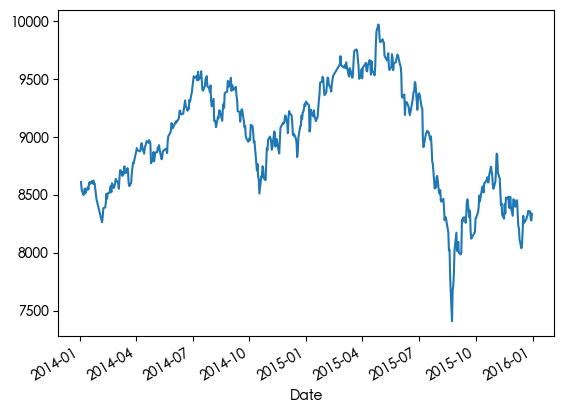

In [18]:
# ch23
import pandas as pd
taiex=pd.read_csv('taiex.csv',sep='\t')

#檢視前3期數據
taiex.head(n=3)

#檢視數據taiex的類型
type(taiex)

#提取加權股價指數的收盤指數數據
Close=taiex.Close
Close.head(n=3)
type(Close)
type(Close.index)

#將收盤指數轉換成時間序列格式
Close.index=pd.to_datetime(taiex.Date)
Close.head()

#檢視Close的類型
type(Close)
#Close的index是日期數據

type(Close.index)

#最後，繪製時間序列圖
Close.plot()

#截取2015年10月8日到10月31日的數據
taiex.index = pd.to_datetime(taiex.Date)
taiex=taiex.iloc[:,1:]
taiexPart = taiex['2015-10-08':'2015-10-31']

#檢視前兩期數據
taiexPart.head(n=2)

#檢視後兩個交易數據
taiexPart.tail(n=2)

#截取2015年數據
taiex2015=taiex['2015':'2015']
#檢視2015年前2期交易數據
taiex2015.head(n=2)
#檢視後2期交易數據
taiex2015.tail(n=2)

#選取2015年初以後的數據
taiexAfter2015=taiex['2015-01-01':]
taiexAfter2015.head(n=2)
#選取2015年以前的數據
taiexBefore2015=taiex[:'2015-01-01']
taiexBefore2015.tail(n=2)

#選取2014年9月到年底的數據
taiex9End=taiex['2014-09':'2014']
taiex9End.head(n=2)
taiex9End.tail(n=2)

count     492.000000
mean     8975.810467
std       476.946252
min      7410.340000
25%      8599.502500
50%      9002.190000
75%      9370.940000
max      9973.120000
Name: Close, dtype: float64

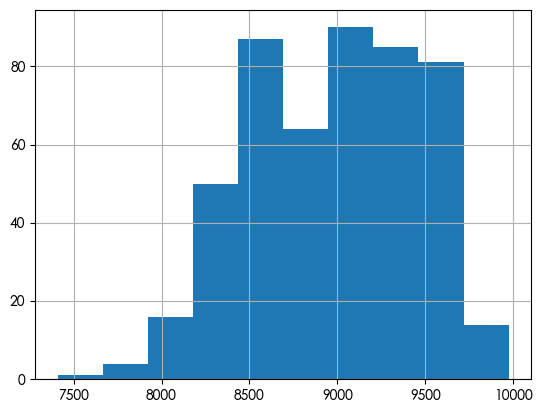

In [19]:
Close.head()
Close.tail(n=1)
Close.hist()
#求最大值
Close.max()
#求最小值
Close.min()
#求均值
Close.mean()
#求中位數
Close.median()
#求標準差
Close.std()
#總結數據分佈情況
Close.describe()

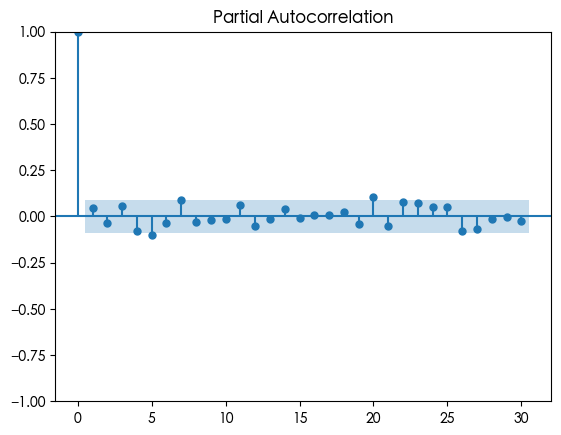

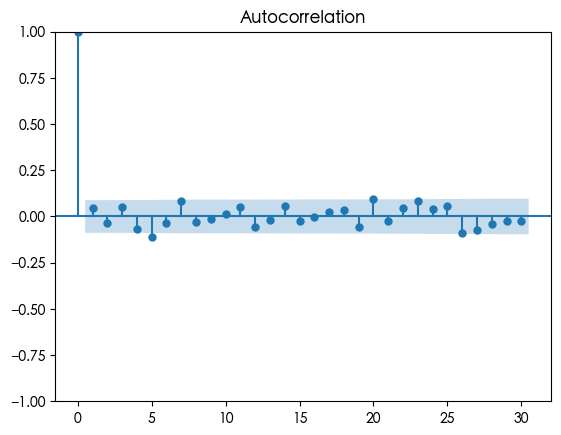

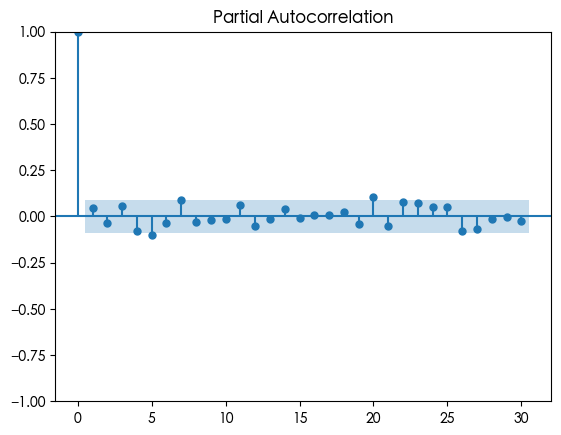

In [26]:
# ch24
import pandas as pd
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from arch.unitroot import ADF

#讀取資料
taiex = pd.read_csv('taiex.csv',sep='\t')
taiex.index=pd.to_datetime(taiex.Date)

close=taiex.Close
taiexRet = (close-close.shift(1))/close
taiexRet.head()
taiexRet.tail()
taiexRet=taiexRet.dropna()

#計算自相關係數
acfs=stattools.acf(taiexRet)
acfs[:5]

#計算偏自相關係數
pacfs=stattools.pacf(taiexRet)
pacfs[:5]

#繪制自相關係數圖
plot_acf(taiexRet,use_vlines=True,lags=30)

plot_pacf(taiexRet,use_vlines=True,lags=30)

Text(0.5, 1.0, '2014-2015年加權股價指數收盤指數時序圖 ')

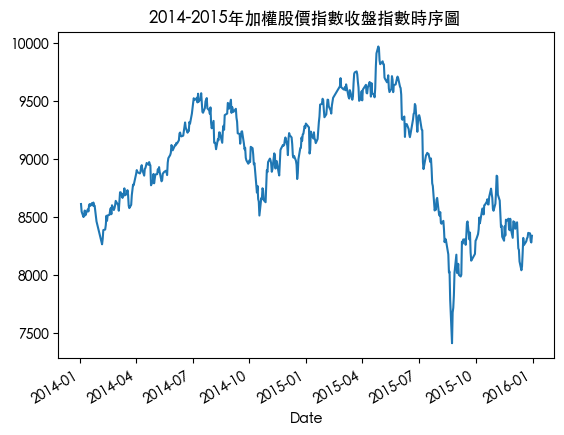

In [28]:
# 加權股價指數是不定態的 有明顯上升趨勢
close.plot()
plt.title('2014-2015年加權股價指數收盤指數時序圖 ')

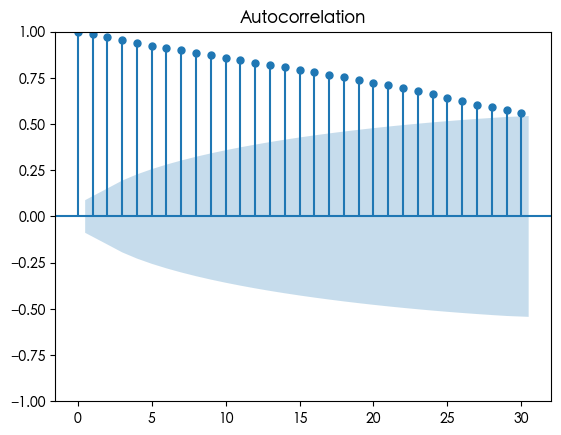

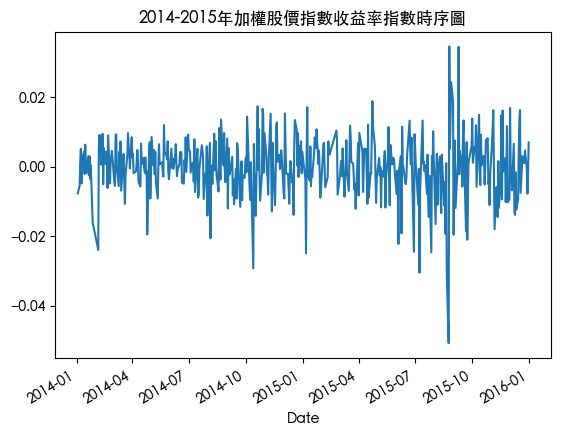

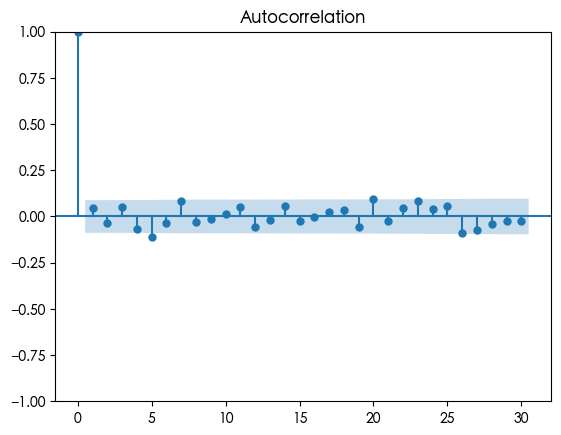

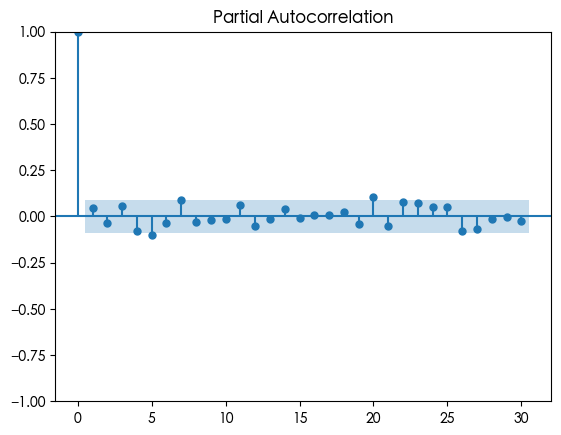

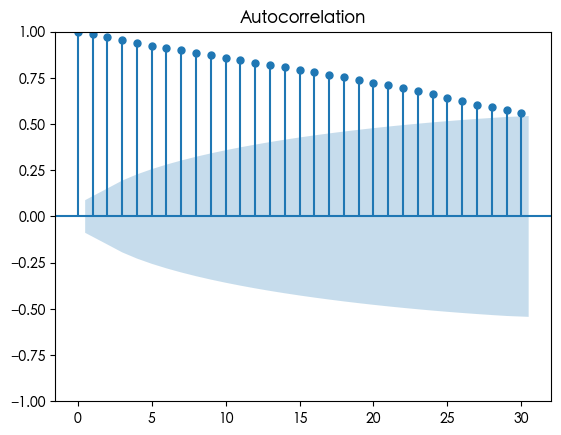

In [34]:
# 加權指數收益率則具有定態性
taiexRet.plot()
plt.title('2014-2015年加權股價指數收益率指數時序圖')

# 具定態性自關關係數或偏自相關係數會很快減小至0(統計學上與0無顯著差異)
plot_acf(taiexRet,use_vlines=True,lags=30)
plot_pacf(taiexRet,use_vlines=True,lags=30)
plot_acf(close,use_vlines=True,lags=30)

In [36]:
# 單根檢定 若多項式具單根 則為不定態
adf_taiexRet=ADF(taiexRet)
# ADF()函數傳回的是一個類ADF物件 無法直接匯出 需要借助summary()
print(adf_taiexRet.summary().as_text())
adfclose=ADF(close)
print(adfclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.505
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.565
P-value                         0.501
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


0.0773488187566173
0.0


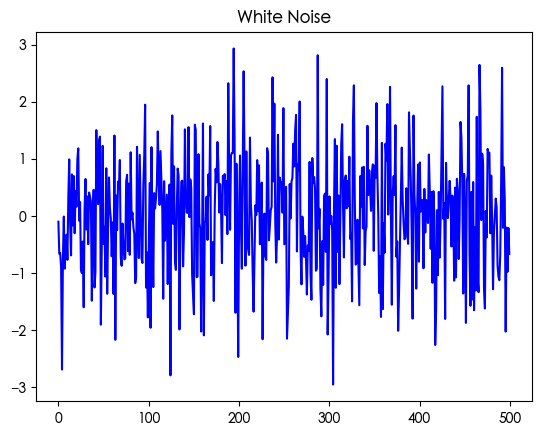

In [38]:
# 在弱式有效市場中資產收益率序列 不存在自相關性
# 若有相關性 則可以進行套利 套利後相關性也會消失
#生成純隨機序列 白雜訊序列不存在自相關性 也就無法預測
whiteNoise=np.random.standard_normal(size=500)

#繪制該序列圖
plt.plot(whiteNoise,c='b')
plt.title('White Noise')

# 白雜訊檢定
# H: 純隨機數列 p > 0.05 要接受虛無假設
LjungBox1=stattools.q_stat(stattools.acf(taiexRet)[1:13],len(taiexRet))
LjungBox1
print(LjungBox1[1][-1])

LjungBox2=stattools.q_stat(stattools.acf(close)[1:13],len(taiexRet))
print(LjungBox2[1][-1])


   Augmented Dickey-Fuller Results   
Test Statistic                 -2.947
P-value                         0.040
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


0.0005560128948515393

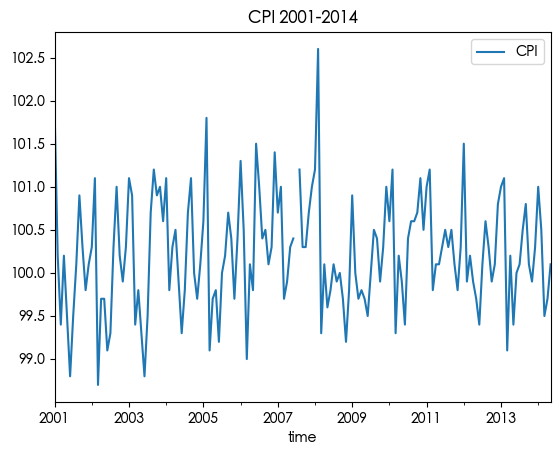

In [42]:
# ch25
import math
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
from arch.unitroot import ADF
from statsmodels.tsa import stattools

#讀取資料
CPI=pd.read_csv('CPI.csv',index_col='time')
CPI.index=pd.to_datetime(CPI.index)
CPI.head(n=3)
# 檢視後三筆資料
CPI.tail(n=3)
CPI.shape
# 按照日期先後順序排列
CPI=CPI.sort_index()
# 選擇train data
CPItrain=CPI[:-3]
CPItrain.tail(n=3)
# 選擇test data
CPItest = CPI[-3:]
CPItest

# 繪製時序圖 直接觀察資料情況
CPI.plot(title='CPI 2001-2014')

# 進行ADF單根檢定 並檢驗結果
# 最大階數設為10
# 防止使用的落後階數過多導致p-value偏低
CPItrain=CPItrain.dropna()
print(ADF(CPItrain,max_lags=10).summary().as_text())

# 判斷是否為白雜訊
LjungBox=stattools.q_stat(stattools.acf(CPItrain)[1:12],len(CPItrain))
LjungBox[1][-1] 


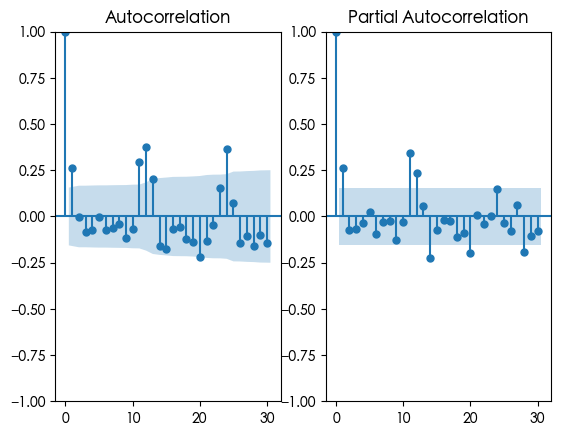

In [44]:
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
#將畫面一分為二
axe1=plt.subplot(121)
axe2=plt.subplot(122)
#在第一個畫面中畫出序列的自相關係數圖
plot1=plot_acf(CPItrain,lags=30,ax=axe1)
#在第二個畫面中畫出序列的偏自相關係數圖
plot2=plot_pacf(CPItrain,lags=30,ax=axe2)

In [85]:
from statsmodels.tsa.arima import model as arima_model

#order表示建立的模型的階數，c(1,0,1)表示建立的是ARMA(1,1)模型；
#中間的數字0表示使用原始的、未進行過差分（差分次數為0）的數據；
#此處我們無需考慮它
model1=arima_model.ARIMA(CPItrain,order=(1,0,1)).fit()
print(model1.summary())
#同理，我們建立起其它階數的模型
model2=arima_model.ARIMA(CPItrain,order=(1,0,2)).fit()
print(model2.summary())
model3=arima_model.ARIMA(CPItrain,order=(2,0,1)).fit()
print(model3.summary())
model4=arima_model.ARIMA(CPItrain,order=(2,0,2)).fit()
print(model4.summary())
model5=arima_model.ARIMA(CPItrain,order=(3,0,2)).fit()
print(model5.summary())

# 用config_int()計算模型中係數的信賴區間
model3.conf_int()

/Users/villager/Moo/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/villager/Moo/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/villager/Moo/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/villager/Moo/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  157
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -150.339
Date:                Sun, 21 Jul 2024   AIC                            308.678
Time:                        15:07:14   BIC                            320.903
Sample:                             0   HQIC                           313.643
                                - 157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.2373      0.072   1384.257      0.000     100.095     100.379
ar.L1          0.0934      0.321      0.291      0.771      -0.536       0.723
ma.L1          0.1931      0.337      0.572      0.5

,0,1
const,100.204969,100.298416
ar.L1,1.112400,1.394196
ar.L2,-0.464549,-0.140574
ma.L1,-20.301668,18.301795
sigma2,-7.049144,7.820423


,CPI
time,
2014-03-01,99.5
2014-04-01,99.7
2014-05-01,100.1


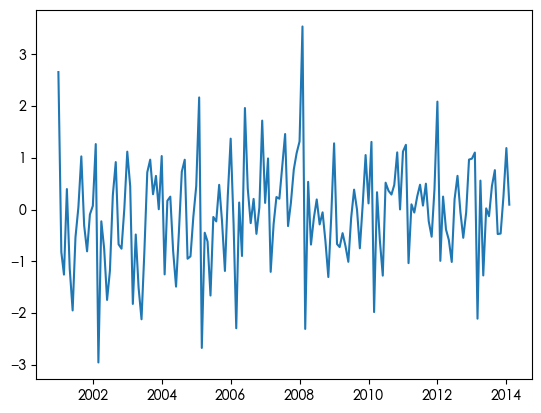

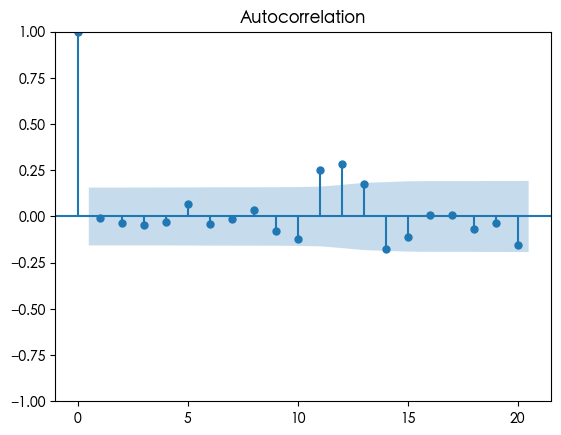

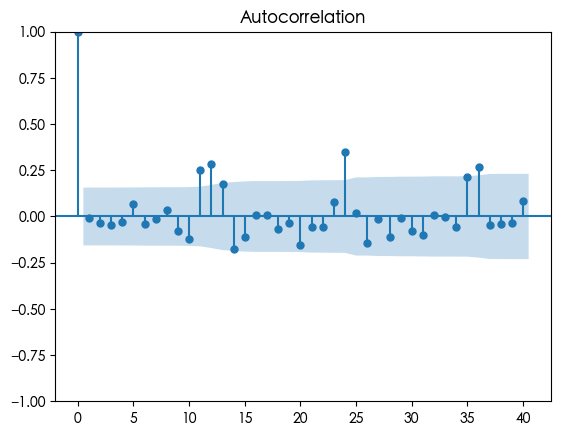

In [91]:
#繪製時間序列模擬的診斷圖
stdresid=model3.resid/math.sqrt(model3.params.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=20)

LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1]
# 增加Ljung Box檢定的落後階數
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:20],len(stdresid))
LjungBox[1][-1]
# 繪製最大落後階數40的字相關係數圖
plot_acf(stdresid,lags=40)
# 每12階會發現自相關係數就會變得顯著 這詩因為資料的季節性產生

# 用model3預測未來3期的CPI
model3.forecast(3)
CPI.head(3)
CPItest


/Users/villager/Moo/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/villager/Moo/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/villager/Moo/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


array([0.92892593, 0.72630952, 0.2601869 , 0.38636185, 0.27798832,
       0.38280656, 0.43225087, 0.2451824 , 0.28446021, 0.36095658,
       0.37232682])

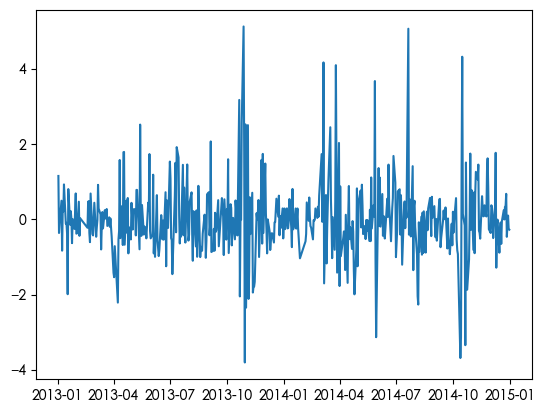

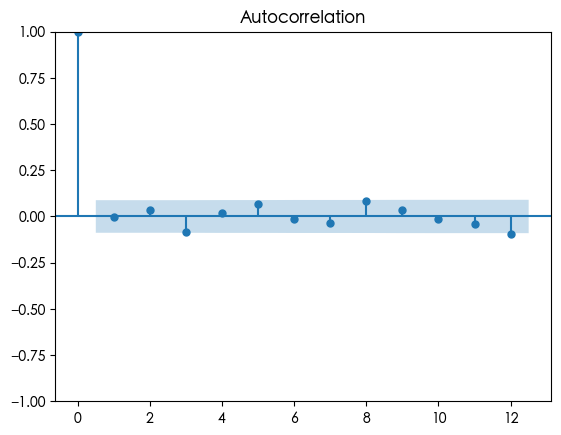

In [92]:
# 讀取資料
taisun=pd.read_csv('1218.csv',sep='\t')
taisun.index=pd.to_datetime(taisun.Date)
taisun.head()
returns=taisun.ROI['2013-01-01':'2015-01-01']
returns.head(n=3)
returns.tail(n=3)
#returns.plot()
# 檢定序列是定態的
ADF(returns).summary()
# 檢定是否為白雜訊
stattools.q_stat(stattools.acf(returns)[1:10],len(returns))[1]
# 建立ARIMA模型
model=arima_model.ARIMA(returns,order=(2,0,1)).fit()
model.summary()
model.conf_int()
stdresid=model.resid/math.sqrt(model.params.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=12)
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:12],len(stdresid))
LjungBox[1]


Optimization terminated successfully    (Exit mode 0)
            Current function value: 895.0641468734129
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    ROI   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -895.064
Distribution:                  Normal   AIC:                           1798.13
Method:            Maximum Likelihood   BIC:                           1816.53
                                        No. Observations:                  736
Date:                Sun, Jul 21 2024   Df Residuals:                      735
Time:                        15:40:59   Df Model:                            1
                                  Mean Model                                 
  

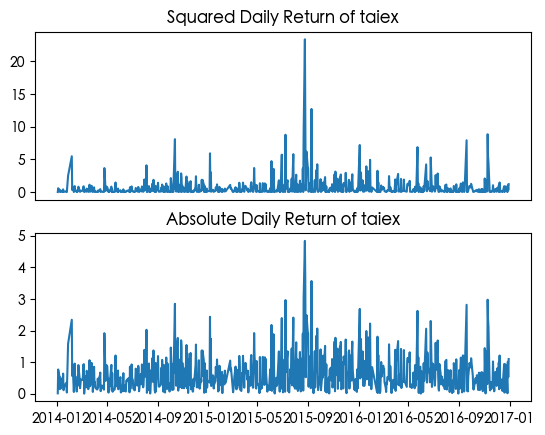

In [93]:
# ch26
import pandas as pd
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt

import numpy as np
from arch import arch_model
# 讀取指數收益率資料
indexRet = pd.read_csv('index.csv',sep='\t')
indexRet.index=pd.to_datetime(indexRet.Date)
indexRet.head()
np.unique(indexRet.CoName)
# 讀取加權指數收益率資料
taiexRet = indexRet.loc[indexRet.CoName=='TSE Taiex    '].ROI
taiexRet.head()
taiexRet.tail()
taiexRet = taiexRet.astype(float).dropna()
#繪制收益率平方序列圖
plt.subplot(211)
plt.plot(taiexRet**2)
plt.xticks([])
plt.title('Squared Daily Return of taiex')
# 繪製收益率平方序列圖
plt.subplot(212)
plt.plot(np.abs(taiexRet))
plt.title('Absolute Daily Return of taiex')
# LB檢定
LjungBox=stattools.q_stat(stattools.acf(taiexRet**2)[1:13],len(taiexRet))
LjungBox[1][-1]
# 建立GARCH模型
am = arch_model(taiexRet)
# update_freq=0表示不匯出中間結果只匯出最終結果
model = am.fit(update_freq=0)
print(model.summary())

In [113]:
# ch27
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.font_manager import FontProperties
#font=FontProperties(fname='C:/Windows/Fonts/msyh.ttf')

### 2365.csv, 2419.csv 原資料有誤 無法執行

#導入ADF函數和numpy包
from arch.unitroot import ADF
import numpy as np
import re
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
# 獲取昆盈股價數據
KYE=pd.read_csv('2365.csv',sep='\t',index_col='Date')
KYE.index=pd.to_datetime(KYE.index)
# 獲取仲琦科技股價數據
Hitron=pd.read_csv('2419.csv',sep='\t',index_col='Date')
Hitron.index=pd.to_datetime(Hitron.index)

# 定義配對形成期(formation period)
formStart='2010-01-01'
formEnd='2011-01-01'

KYEf=KYE[formStart:formEnd]
Hitronf=Hitron[formStart:formEnd]
KYEf.head()
Hitronf.head()
# 將兩支股票收盤價資料合在一起行程Dataframe
pairf=pd.concat([KYEf.Close,Hitronf.Close],axis = 1)
pairf.columns = ['昆盈','仲琦科技']
len(pairf)
pairf.plot(title='2014年收盤價圖')
# 標準化價格之差平方累積函數
def SSD(priceX,priceY):
    if priceX is None or priceY is None:
        print('缺少價格序列.')
    standardX=priceX/priceX[0]
    standardY=priceY/priceY[0]
    SSD=np.sum((standardX-standardY)**2)
    return(SSD) 

KYEf = pairf['昆盈']  
Hitronf = pairf['仲琦科技'] 
dis=SSD(KYEf,Hitronf)
dis

# 檢定昆盈對數價格的一階整合性
KYEflog=np.log(KYEf)
adfA=ADF(KYEflog)
print(adfA.summary().as_text())
# 將昆盈股價的對數價格差分
retA=KYEflog.diff()[1:]
adfretA=ADF(retA)
print(adfretA.summary().as_text())
# 檢定仲琦對數價格的一階整合性
Hitronflog=np.log(Hitronf)
adfB=ADF(Hitronflog)
print(adfB.summary().as_text())
# 將仲琦股價的對數價格差分
retB=Hitronflog.diff()[1:]
adfretB=ADF(retB)
print(adfretB.summary().as_text())

KYEflog.plot(label='昆盈',style='--')
Hitronflog.plot(label='仲琦科技',style='r-')
plt.legend(loc='upper left')
plt.title('昆盈與仲琦科技的對數價格時序圖') 

retA.plot(label='昆盈',style='--')
retB.plot(label='仲琦科技',style='r-')
plt.legend(loc='lower left')
plt.title('昆盈與仲琦科技的對數價格差分(收益率)時序圖') 
#回歸分析 
#因變數是昆盈(A)股票的對數價格 
#自變數是仲琦科技(B)股票的對數價格
model=sm.OLS(KYEflog,sm.add_constant(Hitronflog))
results=model.fit()
print(results.summary())
# 擷取回歸截距項
alpha=results.params[0]  
# 擷取回歸係數
beta=results.params[1]
# 求殘差
spread=KYEflog-beta*Hitronflog-alpha
spread.head()
# 繪製殘差序列時序圖
spread.plot()
plt.title('昆盈與仲琦科技的價差序列') 
# 殘差單根檢定
# 因殘差的均值為0 所以trend設為nc
adfSpread=ADF(spread, trend='nc') 
print(adfSpread.summary().as_text())

#最小距離法交易策略
# 昆盈標準化價格
standardA= KYEf/KYEf[0]
# 仲琦標準化價格
standardB= Hitronf/Hitronf[0]
# 求標準化價格價差
SSD_pair=standardA-standardB

SSD_pair.head() 

meanSSD_pair=np.mean(SSD_pair)
sdSSD_pair=np.std(SSD_pair)
thresholdUp=meanSSD_pair+1.5*sdSSD_pair
thresholdDown=meanSSD_pair-1.5*sdSSD_pair
SSD_pair.plot()
plt.title('昆盈與仲琦科技標準化價差序列(形成期)') 
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red') 
plt.show()

# 設定交易期(Trading Period)
tradStart='2015-01-01'
tradEnd='2015-06-30'

KYEt=KYE[tradStart:tradEnd].Close
Hitront=Hitron[tradStart:tradEnd].Close

def spreadCal(priceX,priceY):
    data = pd.concat([priceX,priceY],axis=1).dropna()
    data.columns=['X','Y']
    standardX=data.X/data.X[0]
    standardY=data.Y/data.Y[0]
    spread=standardX-standardY
    return(spread)

TradSpread=spreadCal(KYEt,Hitront)
TradSpread.describe() 
# 繪製價差序列圖
TradSpread.plot()
plt.title('交易期價差序列')
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red') 

spreadf=KYEflog-beta*Hitronflog-alpha
mu=np.mean(spreadf)
sd=np.std(spreadf)
mu+1.2*sd
mu-1.2*sd

# 交易期
CoSpreadT=np.log(KYEt)-beta*np.log(Hitront)-alpha
CoSpreadT.describe() 

CoSpreadT.plot()
plt.title('交易期價差序列(協整配對)')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+1.2*sd,color='red')
plt.axhline(y=mu-1.2*sd,color='red')

ValueError: Index Date invalid

In [107]:
######PairTrading Class #############

class PairTrading:
    def SSD(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        standardX=priceX/priceX[0]
        standardY=priceY/priceY[0]
        SSD=np.sum((standardY-standardX)**2)
        return(SSD)
    def SSDSpread(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        standardX=priceX/priceX[0]
        standardY=priceY/priceY[0]
        spread=standardY-standardX
        return(spread)
    def cointegration(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        priceX=np.log(priceX)
        priceY=np.log(priceY)
        results=sm.OLS(priceY,sm.add_constant(priceX)).fit()
        resid=results.resid
        adfSpread=ADF(resid)
        if adfSpread.pvalue>=0.05:
            print('''交易價格不具有協整關係.
            P-value of ADF test: %f
            Coefficients of regression:
            Intercept: %f
            Beta: %f
             ''' % (adfSpread.pvalue, results.params[0], results.params[1]))
            return(None)
        else:
            print('''交易價格具有協整關係.
            P-value of ADF test: %f
            Coefficients of regression:
            Intercept: %f
            Beta: %f
             ''' % (adfSpread.pvalue, results.params[0], results.params[1]))
            return(results.params[0], results.params[1])
    def CointegrationSpread(self,priceX,priceY,
                            formStart,formEnd,tradeStart,tradeEnd):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        tradeX=priceX[tradeStart:tradeEnd]
        tradeY=priceY[tradeStart:tradeEnd]
        coefficients=self.cointegration(formX,formY)
        if coefficients is None:
                print('未形成協整關係,無法配對.')
        else:
            spread=(np.log(tradeY)
            -coefficients[0]-coefficients[1]*np.log(tradeX))
            return(spread)
    def calBound(self,priceX,priceY,method,formStart,formEnd,width=1.5):
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        if method=='SSD':
            spread=self.SSDSpread(formX,formY)            
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        elif method=='Cointegration':
            spread=self.CointegrationSpread(priceX,priceY,formStart,formEnd,
                 formStart,formEnd)
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        else:
            print('不存在該方法. 請選擇"SSD"或是"Cointegration".')

In [120]:
#formStart = '2014-01-01'
#formEnd = '2015-01-01'
#tradeStart = '2015-01-01'
#tradeEnd = '2015-06-30'
formStart = '2010-01-01'
formEnd = '2011-01-01'
tradeStart = '2011-01-01'
tradeEnd = '2011-06-30'

# 獲取昆盈股價數據
KYE=pd.read_csv('2365.csv',sep='\t') #,index_col='Date'
KYE.index=pd.to_datetime(KYE.index)
# 獲取仲琦科技股價數據
Hitron=pd.read_csv('2419.csv',sep='\t') # ,index_col='Date'
Hitron.index=pd.to_datetime(Hitron.index)
print(Hitron['Close'])
priceA= Hitron.Close
priceB=KYE.Close
priceAf=priceA[formStart:formEnd]
priceBf=priceB[formStart:formEnd]
priceAt=priceA[tradeStart:tradeEnd]
priceBt=priceB[tradeStart:tradeEnd]

pt=PairTrading()
SSD=pt.SSD(priceAf,priceBf)
SSD
# 形成期
SSDspread=pt.SSDSpread(priceAf,priceBf)
SSDspread.describe()
SSDspread.head()

coefficients=pt.cointegration(priceAf,priceBf)
coefficients
alpha
beta
# 交易期價差序列
CoSpreadF=pt.CointegrationSpread(priceA,priceB,
             formStart,formEnd,formStart,formEnd)
CoSpreadF.head()


CoSpreadTr=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,
            tradeStart,tradeEnd)
CoSpreadTr.describe()
# 根據行程期共整合配對後價差序列得到的臨界值
bound=pt.calBound(priceA,priceB,'Cointegration',
      formStart,formEnd,width=1.2)
bound

KeyError: 'Close'

In [115]:
##########配對交易實測 ###############
mu=np.mean(CoSpreadF)
sd=np.std(CoSpreadF)


#設定交易期
CoSpreadTr.plot()
plt.title('交易期價差序列(協整配對)')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu-0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu+1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu-1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu+2.5*sd,color='red',ls='-.',lw=3) 
plt.axhline(y=mu-2.5*sd,color='red',ls='-.',lw=3) 

# 構造開倉平倉區間
level=(float('-inf'),mu-2.5*sd,
    mu-1.5*sd,mu-0.2*sd,
    mu+0.2*sd,mu+1.5*sd,
    mu+2.5*sd,
    float('inf'))

prcLevel=pd.cut(CoSpreadTr,level,labels=False)-3

prcLevel.head() 
# 構造交易訊號函數
def TradeSig(prcLevel):
    n=len(prcLevel)
    signal=np.zeros(n)
    for i in range(1,n):
        if prcLevel[i-1]==1 and prcLevel[i]==2:
            signal[i]=-2
        elif prcLevel[i-1]==1 and prcLevel[i]==0:
            signal[i]=2
        elif prcLevel[i-1]==2 and prcLevel[i]==3:
            signal[i]=3
        elif prcLevel[i-1]==-1 and prcLevel[i]==-2:
            signal[i]=1
        elif prcLevel[i-1]==-1 and prcLevel[i]==0:
            signal[i]=-1
        elif prcLevel[i-1]==-2 and prcLevel[i]==-3:
            signal[i]=-3
    return(signal)

signal=TradeSig(prcLevel)

position=[signal[0]]
ns=len(signal)
# 記錄倉位狀況
for i in range(1,ns):
    position.append(position[-1])
    if signal[i]==1:
        position[i]=1
    elif signal[i]==-2:
        position[i]=-1
    elif signal[i]==-1 and position[i-1]==1:
        position[i]=0
    elif signal[i]==2 and position[i-1]==-1:
        position[i]=0
    elif signal[i]==3:
        position[i]=0
    elif signal[i]==-3:
        position[i]=0

position=pd.Series(position,index=CoSpreadT.index)

position.tail() 
# 模擬交易
def TradeSim(priceX,priceY,position):
    n=len(position)
    shareY=10000*position
    shareX=[(-beta)*shareY[0]*priceY[0]/priceX[0]]
    cash=[10000]
    for i in range(1,n):
        shareX.append(shareX[i-1])
        cash.append(cash[i-1])
        if position[i-1]==0 and position[i]==1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==0 and position[i]==-1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
        elif position[i-1]==-1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
    cash = pd.Series(cash,index=position.index)
    shareY=pd.Series(shareY,index=position.index)
    shareX=pd.Series(shareX,index=position.index)
    asset=cash+shareY*priceY+shareX*priceX
    account=pd.DataFrame({'Position':position,'ShareY':shareY,'ShareX':shareX,'Cash':cash,'Asset':asset})
    return(account)


account1=TradeSim(Hitront,KYEt,position)
account1.tail() 
account1.ix[-1,'Asset']
# 繪製資產帳戶圖
plt.subplot(211)
plt.plot(account1.Asset,label='asset')
plt.title('配對交易賬戶') 
plt.legend()
plt.ylabel('asset')
plt.subplot(212)
plt.plot(account1.ShareX,label='仲琦科技')
plt.plot(account1.ShareY,':',label='昆盈')
plt.ylabel('share')
plt.title('配對交易倉位情況')
plt.legend()
plt.show()


NameError: name 'CoSpreadF' is not defined

# Excercise

### 讀取匯率資料exchange.csv 將其轉換成時間序列資料

### 繪製時間序列圖 並觀察其存在型態

### 讀取標普500指數日回報率資料

* 繪製時間序列圖 並判斷其是否定態
* 繪製ACF圖與PACF圖
* 進行ADF檢定以驗證判斷

### 抓取統一2013年的收盤資料

* 繪製時間序列圖與ACF圖 判斷其是否定態
* 進行ADF檢定 驗證判斷
* 計算統一的連續複利收益率序列並繪製時間序列圖
* 進行ADF檢定 判斷收益率序列是不是定態序列
* 如果收益率序列是定態序列的話 繪製ACF圖與PACF圖以選取模型
* 估計模型中的係數 並寫出擬合的模型

### 抓取泰山(1218) 2012年的收盤價資料

* 計算收益率序列並繪製時間序列圖
* 進行ADF檢定 判斷收益率序列是否定態
* 繪製ACF圖與PACF圖 根據AIC選取出最佳模型
* 對模型進行診斷
* 預測未來10期的收盤價資料 並與真實的資料進行比較

### 抓取Google 股票月度收益資料

* 繪製期時間序列圖 並判斷其是否定態
* 繪製ACF圖以及PACF圖
* 進行Ljung-Box檢定 判斷其是否為白雜訊
* 繪製其平方的時間序列圖 並判斷是否存在波動叢聚效應
* 繪製其平方的ACF圖以及PACF圖
* 用Ljung-Box檢定是否存在ARCH效應
* 若存在ARCH效應 使用GARCH(1,1)模型擬合資料 並寫出擬合的模型

### 抓取新台幣對美元的匯率資料

* 繪製其時間序列圖 並判斷其是否定態
* 計算該匯率的日變動百分比序列並繪製其時間序列圖
* 繪製該匯率的日變動百分比序列的ACF圖以及PACF圖
* 進行Ljung-Box檢定 判斷是否是白雜訊
* 繪製改匯率日變動百分比序列的平方的時間序列圖 並判斷是否存在波動叢聚效應
* 繪製其ACF圖以及PACF圖
* 檢定該匯率的日變動百分比序列是否存在ARCH效應
* 使用GARCH模型擬合資料 並寫出擬合的模型

### 抓取仲琦與昆盈兩支股票在2009年1月2日到2012年12月31日之間的交易資料

* 選取兩支估票在2009年1月2日到2011年12月31日作為訓練集 對兩支股票的價格序列進行相關性檢定
* 如果兩支股票價格序列相關性較大 對兩支股票進行配對 求出價差 並對價差進行定態性檢定
* 求出價差的分位數區間狀態

### 繼續分析 運用標準差配對交易策略進行交易實測 劃分價差區間狀態的3個標準差倍數0.2,1.5,2.5改成0.4,1.6,2.3再進行交易實測 觀察交易有什麼變化

### 在2015年上半年發布的台灣50指數成分股中 撰寫程式碼找出可以用來配對的股票對數
